In [37]:
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.gridspec as grid_spec
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import polyfit

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [38]:
demographic = pd.read_csv("../Data_final/demographic_refined.csv")
df = demographic

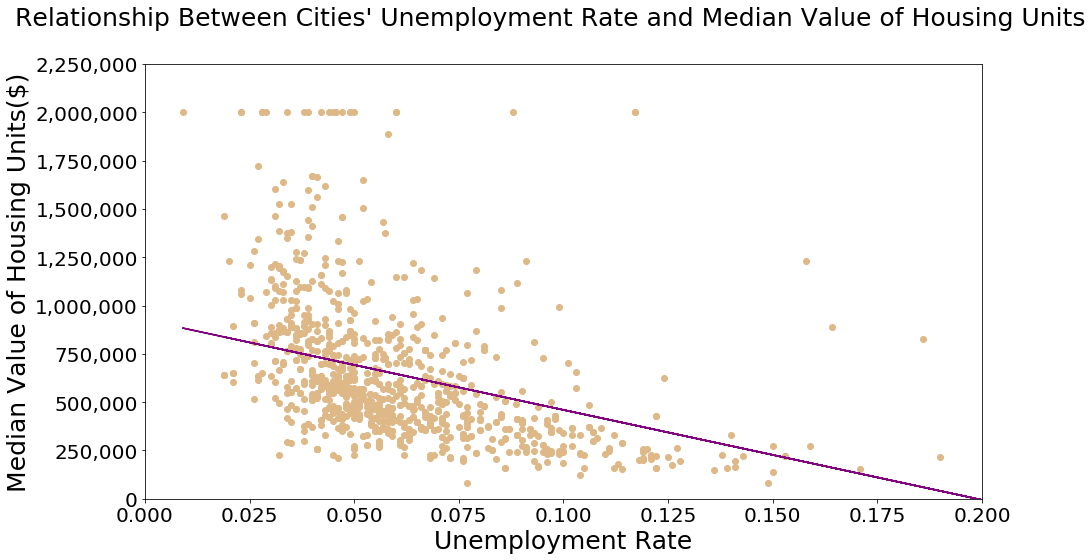

In [39]:
fig, ax = plt.subplots(figsize=(15,8))
ax. ticklabel_format(useOffset=False, style='plain')
##ttl = ax.title
ax.title.set_position([0.5, 50])

b, m = polyfit(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], 1)
plt.plot(demographic['unemployment_pct'], b + m * demographic['unemployment_pct'], color = "purple")

plt.scatter(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], color = "burlywood")

##plt.title("Relationship Between Cities' Unemployment Rate and Median Value of Housing Units", fontsize = 20)
fig.suptitle("Relationship Between Cities' Unemployment Rate and Median Value of Housing Units", fontsize=25)
plt.xlabel("Unemployment Rate", fontsize = 25)
plt.ylabel("Median Value of Housing Units($)", fontsize = 25)
plt.xlim(0, 0.2)
plt.ylim(0, 2250000)
plt.xticks(fontsize= 20)
##ax.set_xticklabels(demographic['unemployment_pct'], fontsize = 20)
ax.set_yticklabels(['0', "250,000", "500,000", "750,000", "1,000,000", "1,250,000", "1,500,000", "1,750,000",
                   "2,000,000", "2,250,000"], fontsize = 20)

plt.show()

In [40]:
temp = demographic
temp = temp.drop("zipcode", axis=1)
tc = temp.corr()
tc = tc.drop(columns=['median_household_income', 'average_household_income', 'per_capita_income', 'percent_of_households_with_incomes_200000_or_more',
                'householder_45_to_64_years', 'householder_65_years_and_over', 'hhi_lt_25k', 'hhi_25k_to_49k', 
                'hhi_50k_to_749k', 'hhi_75k_to_999k', 'hhi_100k_to_1490k', 'hhi_150k_to_1999k', 'race_and_ethnicity_total',
                'family_poverty_pct'])
tc

,population,population_rank,aland,householder_under_25_years,householder_25_to_44_years,hhi_total,hhi_200k_or_more,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,unemployment_pct,housing_units,median_value_of_owner_occupied_units
population,1.000000,-0.521971,-0.173483,-0.116161,-0.080359,0.047430,-0.010158,0.335937,-0.007679,0.121016,0.042486,0.066451,0.058902,0.172190
population_rank,-0.521971,1.000000,0.160364,0.048051,0.073399,-0.017183,0.035263,-0.253913,0.112003,-0.068473,-0.011797,-0.059539,-0.020516,-0.036609
aland,-0.173483,0.160364,1.000000,-0.047605,-0.072534,0.092692,-0.029274,-0.351652,-0.041117,-0.186150,-0.152612,0.055930,0.097563,-0.202925
median_household_income,-0.099208,0.095809,-0.039214,0.447328,0.934735,-0.149666,0.684324,-0.199432,0.447037,0.688101,0.707978,-0.513531,-0.155062,0.682966
average_household_income,-0.019684,0.065140,-0.068651,0.386456,0.878692,-0.197429,0.645888,-0.142285,0.449130,0.737667,0.783493,-0.453742,-0.192069,0.830093
per_capita_income,0.083333,0.004798,-0.105331,0.331031,0.798049,-0.159839,0.611961,-0.009169,0.574400,0.761005,0.797552,-0.510137,-0.136741,0.812926
percent_of_households_with_incomes_200000_or_more,-0.013068,0.048281,-0.074741,0.418141,0.893614,-0.178706,0.696249,-0.089861,0.440956,0.749420,0.812870,-0.457493,-0.173317,0.812020
householder_under_25_years,-0.116161,0.048051,-0.047605,1.000000,0.477576,-0.004725,0.425426,0.031635,0.190594,0.275353,0.240583,-0.241959,-0.011233,0.316124
householder_25_to_44_years,-0.080359,0.073399,-0.072534,0.477576,1.000000,-0.152785,0.689957,-0.089449,0.465215,0.699580,0.709597,-0.500908,-0.155160,0.679563
householder_45_to_64_years,-0.129282,0.152741,-0.017938,0.349077,0.853349,-0.163937,0.640307,-0.278476,0.431854,0.666777,0.742815,-0.493718,-0.170239,0.673238


[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'population_rank'),
 Text(2.5, 0, 'aland'),
 Text(3.5, 0, 'householder_under_25_years'),
 Text(4.5, 0, 'householder_25_to_44_years'),
 Text(5.5, 0, 'hhi_total'),
 Text(6.5, 0, 'hhi_200k_or_more'),
 Text(7.5, 0, 'population_density_sq_mi'),
 Text(8.5, 0, 'median_age'),
 Text(9.5, 0, 'educational_attainment_bachelors'),
 Text(10.5, 0, 'educational_attainment_graduate'),
 Text(11.5, 0, 'unemployment_pct'),
 Text(12.5, 0, 'housing_units'),
 Text(13.5, 0, 'median_value_of_owner_occupied_units')]

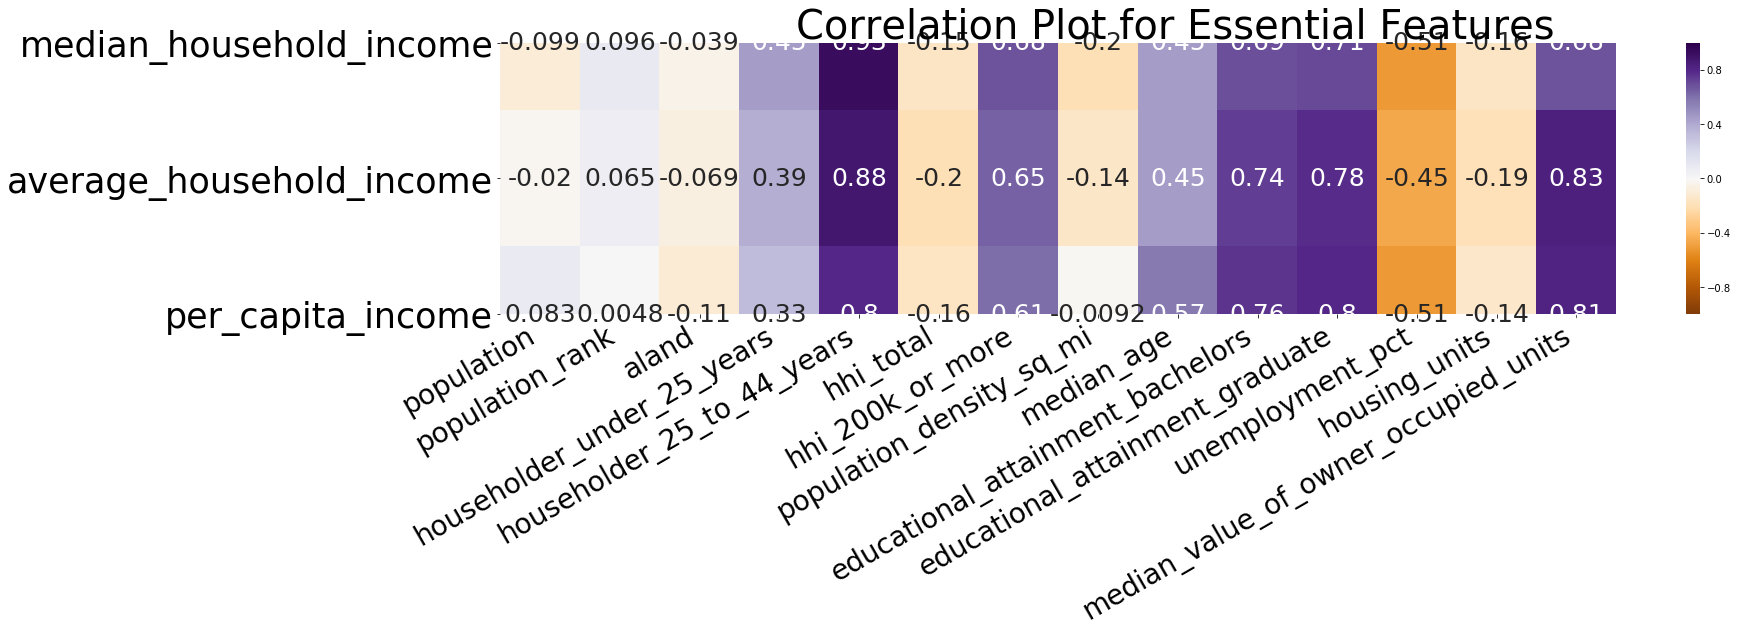

In [41]:
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(tc[3:6], annot = True, 
            cmap=plt.get_cmap('PuOr'), vmin = -1, vmax = 1, annot_kws={"fontsize":25})
fig.suptitle('Correlation Plot for Essential Features', fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 35)
ax.set_xticklabels(ax.get_xticklabels(), rotation="30", horizontalalignment='right', fontsize = 28)

In [42]:
housing = pd.read_csv("../Data_final/zip_housing_cleaned.csv")
housing

,Unnamed: 0,property_id,prop_type,year_built,is_new_construction,beds,baths,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code,baths_full,baths_half
0,0,O2889402305,multi_family,1906,f,3,2.0,3,570000,7057,1756,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001,2,0
1,1,O1305476579,single_family,1913,f,3,1.5,1,470000,5721,1030,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001,1,1
2,2,O9299703972,multi_family,1938,f,3,2.0,2,830000,5495,2503,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
3,3,O2866856410,single_family,1905,f,4,2.0,2,400000,5387,1248,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
4,4,O2823776981,condo,1912,f,5,2.0,2,659000,5667,1897,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,98073,O1392454616,single_family,2006,f,3,2.5,2,275000,2614,1430,2365 LA Villa Way,"['Northeast Redding', 'The Villages at Shasta ...",Redding,Shasta,CA,96003,2,1
98074,98074,O2959173930,NaN,1972,f,3,2.0,2,899000,1146783,3550,13450 Mitchellinda Dr,NaN,Redding,Shasta,CA,96003,2,0
98075,98075,O1290952370,single_family,1977,f,3,2.0,5,483500,89734,2552,19287 Roxie Ln,NaN,Redding,Shasta,CA,96003,2,0
98076,98076,O1523744489,single_family,1984,f,4,3.0,4,345000,87120,2040,13143 Tamera Way,NaN,Redding,Shasta,CA,96003,3,0


In [43]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=False)
housing_groupby_city

housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10

,city,Unnamed: 0,year_built,beds,baths,garage,price,lot_size,building_size,postal_code,baths_full,baths_half
85,Palo Alto,65859.0,1956.0,3.0,2.0,2.0,2744000.0,6900.0,1762.0,94303.0,2.0,0.0
77,Newport Beach,43242.5,1973.0,3.0,2.5,2.0,2245000.0,6375.0,2244.0,92661.0,2.0,0.0
74,Mountain View,60729.0,1978.0,3.0,2.5,2.0,1700000.0,5245.0,1526.0,94041.0,2.0,0.0
97,Redwood City,61174.0,1962.0,3.0,2.0,2.0,1650000.0,6782.0,1620.0,94062.0,2.0,0.0
115,Santa Barbara,51861.0,1971.0,3.0,2.0,2.0,1567500.0,9583.0,0.0,93105.0,2.0,0.0
126,Sunnyvale,61937.5,1972.0,3.0,2.0,2.0,1407500.0,6240.5,1529.0,94087.0,2.0,0.0
120,Santa Monica,8787.0,1969.0,2.0,2.0,2.0,1395000.0,8008.0,1472.0,90403.0,2.0,0.0
36,Encinitas,23048.5,1983.0,3.0,2.5,2.0,1380500.0,16446.0,1828.5,92024.0,2.0,0.0
108,San Francisco,63988.0,1942.0,3.0,2.0,2.0,1380000.0,5001.0,1385.0,94116.0,2.0,0.0
112,San Mateo,66270.0,1958.0,3.0,2.0,2.0,1380000.0,7548.0,1440.0,94402.0,2.0,0.0


[Text(0, 0, '0'),
 Text(0, 0, '1,000,000'),
 Text(0, 0, '2,000,000'),
 Text(0, 0, '3,000,000'),
 Text(0, 0, '4,000,000'),
 Text(0, 0, '5,000,000'),
 Text(0, 0, '6,000,000')]

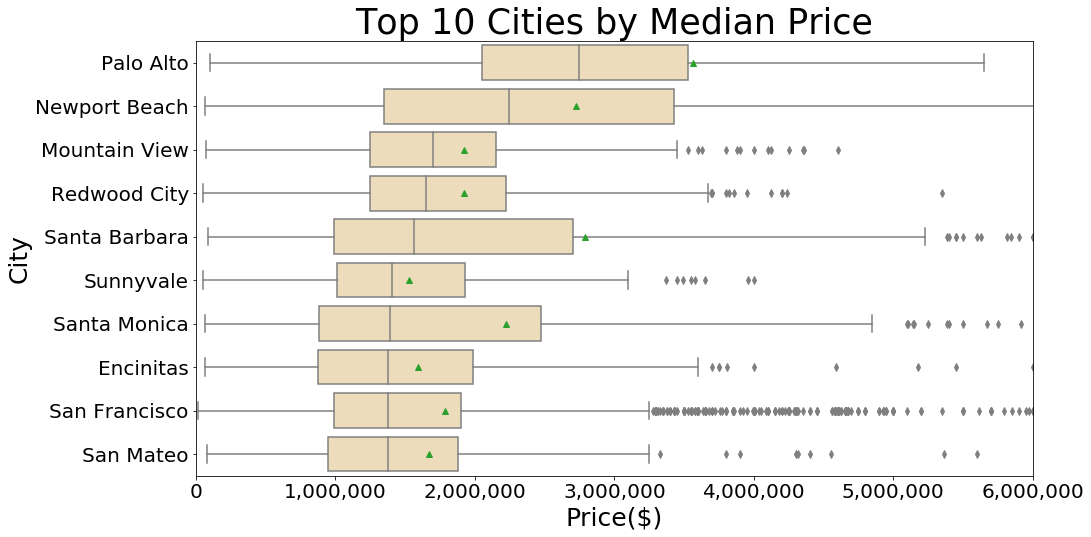

In [44]:
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))
ax1.ticklabel_format(useOffset=False, style='plain')

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans = True, 
           order = ['Palo Alto', 'Newport Beach', 'Mountain View', 'Redwood City', 'Santa Barbara', 'Sunnyvale',
                   'Santa Monica', 'Encinitas', 'San Francisco', 'San Mateo'])
plt.title("Top 10 Cities by Median Price", fontsize = 35)
plt.xlabel("Price($)", fontsize = 25)
plt.ylabel("City", fontsize = 25)
plt.xlim(0, 6000000)

plt.yticks(fontsize= 20)
ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)

In [45]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=True)
housing_groupby_city

,city,Unnamed: 0,year_built,beds,baths,garage,price,lot_size,building_size,postal_code,baths_full,baths_half
131,Tulare,52162.5,1972.0,3.0,2.0,2.0,267000.0,8134.5,1279.0,93274.0,2.0,0.0
5,Bakersfield,53704.0,1979.0,3.0,2.0,2.0,279000.0,7703.0,1634.0,93308.0,2.0,0.0
4,Apple Valley,31723.5,1983.0,3.0,2.0,2.0,291500.0,25651.0,2176.5,92307.5,2.0,0.0
48,Hemet,37232.5,1978.0,3.0,2.0,2.0,293750.0,7405.0,1465.0,92544.0,2.0,0.0
139,Visalia,52453.0,1972.0,3.0,2.0,2.0,295000.0,7405.0,1359.0,93291.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Santa Barbara,51861.0,1971.0,3.0,2.0,2.0,1567500.0,9583.0,0.0,93105.0,2.0,0.0
97,Redwood City,61174.0,1962.0,3.0,2.0,2.0,1650000.0,6782.0,1620.0,94062.0,2.0,0.0
74,Mountain View,60729.0,1978.0,3.0,2.5,2.0,1700000.0,5245.0,1526.0,94041.0,2.0,0.0
77,Newport Beach,43242.5,1973.0,3.0,2.5,2.0,2245000.0,6375.0,2244.0,92661.0,2.0,0.0


[Text(0, 0, '0'),
 Text(0, 0, '1,000,000'),
 Text(0, 0, '2,000,000'),
 Text(0, 0, '3,000,000'),
 Text(0, 0, '4,000,000'),
 Text(0, 0, '5,000,000'),
 Text(0, 0, '6,000,000')]

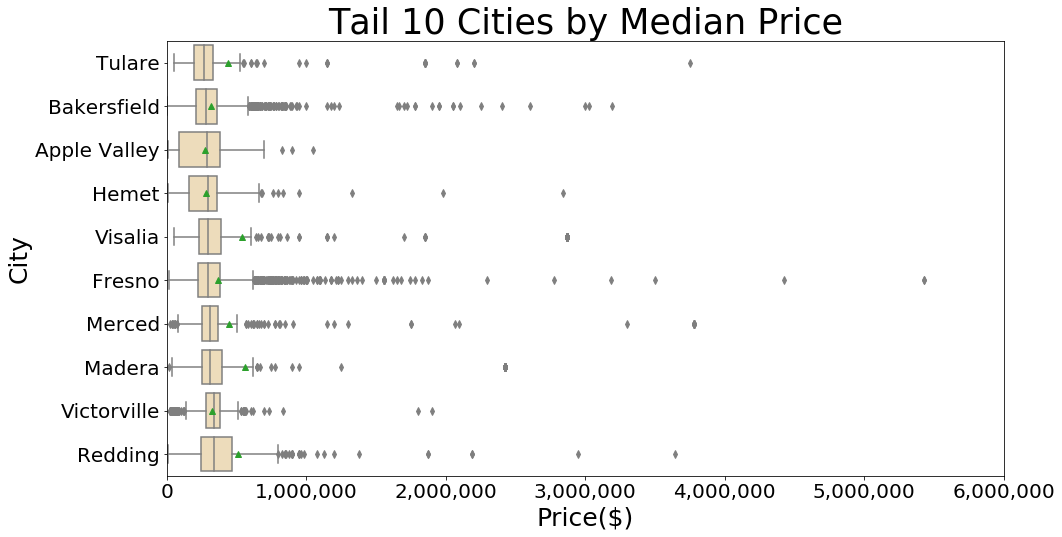

In [46]:
housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans=True, 
           order = top_10_list)
plt.title("Tail 10 Cities by Median Price", fontsize = 35)
plt.xlabel("Price($)", fontsize = 25)
plt.ylabel("City", fontsize = 25)
plt.xlim(0, 6000000)

plt.yticks(fontsize= 20)
ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)

In [47]:
data =housing_groupby_city_top_10

In [48]:
countries = [x for x in np.unique(data['city'])]
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

ValueError: `dataset` input should have multiple elements.

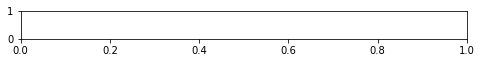

In [56]:
gs = (grid_spec.GridSpec(len(countries),1))

fig = plt.figure(figsize=(8,6))

i = 0

#creating empty list
ax_objs = []

for country in countries:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    plot = (data[data['city'] == country]['price'].plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0, 1)
    ax_objs[-1].set_ylim(0,2.2)

    i += 1

plt.tight_layout()
plt.show()

In [57]:
data.to_csv('tail10.csv')